### Importing necessary packages

In [46]:
import pandas as pd
import glob
import chardet
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Collection and Preprocessing
The function processes a directory of CSV files, updates their headers with specified column names, appends a "YEAR" column based on file names, and then combines all the data into a single Pandas DataFrame. This function facilitates the streamlined analysis of employee earnings data from multiple CSV files within a specified directory.

In [47]:
def get_file_encoding(file_path):
    """
    Detects and returns the encoding of a file.

    Parameters:
    - file_path (str): The path to the file.

    Returns:
    - str: The detected encoding of the file.
    """
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']


def change_headers(file_path, new_column_names):
    """
    Change headers in a CSV file to the specified new column names.

    Parameters:
    - file_path (str): Path to the CSV file.
    - new_column_names (list): List of new column names.

    Returns:
    - pd.DataFrame: DataFrame with updated column names.
    """
    encoding = get_file_encoding(file_path)
    df = pd.read_csv(file_path, encoding=encoding)
    df.columns = new_column_names
    return df

def combine_csv_files(directory_path, new_column_names):
    """
    Combine all CSV files from a directory into a single DataFrame with updated column names.

    Parameters:
    - directory_path (str): Path to the directory containing CSV files.
    - new_column_names (list): List of new column names.

    Returns:
    - pd.DataFrame: Combined DataFrame containing data from all CSV files.
    
    """
    
    # Get a list of all CSV files in the directory
    csv_files = glob.glob(f'{directory_path}/*.csv')

    # Initialize an empty list to store DataFrames
    dataframes = []

    # Change headers and append each CSV file to the list
    for file in csv_files:
        df = change_headers(file, new_column_names)
        year = int(os.path.basename(file).split('_')[-1].split('.')[0])  # Extract year from file name
        df['YEAR'] = year
        dataframes.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(dataframes, ignore_index=True)

    return combined_df

# path to directory containing CSV files
directory_path = 'data_EER'

# Define the new column names
new_column_names = ['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 
                    'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS','POSTAL']

combined_data = combine_csv_files(directory_path, new_column_names)

In [48]:
# Display the first few rows of the combined DataFrame
combined_data.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL,YEAR
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,"$145,787.56",NaN,"$13,160.94","$124,395.57",NaN,"$45,210.00","$36,447.09","$365,001.16",02186,2020
1,"Lee,Waiman",Boston Police Department,Police Detective,"$108,803.25",NaN,"$16,324.27","$96,126.59",NaN,"$111,688.00","$27,200.78","$360,142.89",02134,2020
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$19,672.83","$155,123.11",NaN,"$5,088.00","$33,175.06","$345,758.44",02136,2020
3,"Danilecki,John H",Boston Police Department,Police Captain,"$162,770.15",NaN,"$24,504.13","$64,326.60","$3,548.13","$43,200.00","$41,579.47","$339,928.48",02081,2020
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$16,723.95","$156,754.23",NaN,NaN,"$33,175.06","$339,352.68",02132,2020


In [49]:
combined_data.shape

(267075, 13)

In [51]:
combined_data.columns

Index(['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER',
       'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS',
       'POSTAL', 'YEAR'],
      dtype='object')

### Column Description

1. 'NAME' => This column contains the names of the employees.

2. 'DEPARTMENT_NAME' => Indicates the department to which the employee belongs.

3. 'TITLE': Represents the job title or position of the employee within the organization.

4. REGULAR => represents the base salary for each employee and anything that does not fall into one of the other categories

5. RETRO => Regular Retro earnings, typically refers to adjustments made to an employee's salary, often to correct errors or to account for changes in pay rates that occurred retroactively.

6. OTHER => Bonus Incentive Earnings, Earnings beyond base salary that relate to special titles, skills or education AND NOT related to hours worked beyond the normal workday schedule

7. OVERTIME => Billable Overtime, Earnings beyond base salary that are based on length of service to the City (career awards, longevity) AND related to hours worked beyond the normal workday schedule

8. INJURED => Regular Injured Earnings and Retro Injured Earnings, represents earnings related to injuries, possibly including compensation or benefits for work-related injuries.

9. DETAIL => Paid Detail earnings, include additional earnings for specific duties or tasks beyond the employee's regular responsibilities.

10. QUINN_EDUCATION => Renamed to be Education Incentive Earnings for CY2015; includes earnings related to education incentives for employees, specifically for Police Uniform Education Earners.

11. 'TOTAL_GROSS' => total gross earnings for each employee

12. 'POSTAL' => contains the postal code or address information for the employee.

In [52]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267075 entries, 0 to 267074
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   NAME             267069 non-null  object
 1   DEPARTMENT_NAME  267069 non-null  object
 2   TITLE            267069 non-null  object
 3   REGULAR          262382 non-null  object
 4   RETRO            152718 non-null  object
 5   OTHER            214281 non-null  object
 6   OVERTIME         172303 non-null  object
 7   INJURED          139635 non-null  object
 8   DETAIL           145043 non-null  object
 9   QUINN_EDUCATION  139603 non-null  object
 10  TOTAL_ GROSS     267069 non-null  object
 11  POSTAL           266968 non-null  object
 12  YEAR             267075 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 26.5+ MB


In [53]:
# Convert the 'YEAR' column in the 'combined_data' DataFrame to datetime format using the specified format.
combined_data['YEAR'] = pd.to_datetime(combined_data['YEAR'], format='%Y')

In [54]:
combined_data.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL,YEAR
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,"$145,787.56",NaN,"$13,160.94","$124,395.57",NaN,"$45,210.00","$36,447.09","$365,001.16",02186,2020-01-01
1,"Lee,Waiman",Boston Police Department,Police Detective,"$108,803.25",NaN,"$16,324.27","$96,126.59",NaN,"$111,688.00","$27,200.78","$360,142.89",02134,2020-01-01
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$19,672.83","$155,123.11",NaN,"$5,088.00","$33,175.06","$345,758.44",02136,2020-01-01
3,"Danilecki,John H",Boston Police Department,Police Captain,"$162,770.15",NaN,"$24,504.13","$64,326.60","$3,548.13","$43,200.00","$41,579.47","$339,928.48",02081,2020-01-01
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"$132,699.44",NaN,"$16,723.95","$156,754.23",NaN,NaN,"$33,175.06","$339,352.68",02132,2020-01-01


In [55]:
combined_data.isnull().sum()

NAME                    6
DEPARTMENT_NAME         6
TITLE                   6
REGULAR              4693
RETRO              114357
OTHER               52794
OVERTIME            94772
INJURED            127440
DETAIL             122032
QUINN_EDUCATION    127472
TOTAL_ GROSS            6
POSTAL                107
YEAR                    0
dtype: int64

In [56]:
combined_data["TITLE"].value_counts()

Teacher                           52917
Boston Public Schools             13403
Paraprofessional                  13087
Police Officer                    13040
Fire Fighter                       8124
                                  ...  
Deputy Director, Scheduling           1
Sr. Graphic Designer                  1
H.R.System Administrator              1
BusinessOperationsDataAnalyst         1
Supervisor Of Attendance              1
Name: TITLE, Length: 2540, dtype: int64

In [57]:
combined_data["DEPARTMENT_NAME"].value_counts()

Boston Police Department          31064
Boston Public Schools             24459
Boston Fire Department            17015
Teacher                           10938
BPS Substitute Teachers/Nurs       7070
                                  ...  
Coord of Youth Services               1
TelevisionOperation&TechgMangr        1
Dep Comm-Labor & Legal                1
Central Staff Dir (CC)                1
Program Assistant(PMD/BPD)            1
Name: DEPARTMENT_NAME, Length: 1784, dtype: int64

### Cleaning of Employee Salary Data

This function cleans specified salary columns in a pandas DataFrame by removing non-numeric characters (e.g., commas) and converting the data to numeric values.

In [58]:
def clean_salary_columns(data_frame, salary_columns):
    """
    Cleans up specified salary columns in a pandas DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing the salary columns.
    - salary_columns (list): A list of column names to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with cleaned salary columns.
    """

    # Iterate through specified salary columns and clean up the data
    for col in salary_columns:
        # Remove non-numeric characters (e.g., commas) and convert to numeric
        data_frame[col] = pd.to_numeric(data_frame[col].replace('[^0-9.]', '', regex=True), errors='coerce')

    return data_frame


cleaned_data = clean_salary_columns(combined_data, ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS'])

In [59]:
cleaned_data.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL,YEAR
0,"Smith,Sean P",Boston Police Department,Police Lieutenant,145787.56,NaN,13160.94,124395.57,NaN,45210.0,36447.09,365001.16,02186,2020-01-01
1,"Lee,Waiman",Boston Police Department,Police Detective,108803.25,NaN,16324.27,96126.59,NaN,111688.0,27200.78,360142.89,02134,2020-01-01
2,"Brown,John M",Boston Police Department,Police Sergeant (Det),132699.44,NaN,19672.83,155123.11,NaN,5088.0,33175.06,345758.44,02136,2020-01-01
3,"Danilecki,John H",Boston Police Department,Police Captain,162770.15,NaN,24504.13,64326.60,3548.13,43200.0,41579.47,339928.48,02081,2020-01-01
4,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),132699.44,NaN,16723.95,156754.23,NaN,NaN,33175.06,339352.68,02132,2020-01-01


### Distribution Plots for Employee Earning Columns
The function generates distribution plots for specified columns in a given pandas DataFrame. The steps include creating subplots for each column, iterating through the specified columns, and using Seaborn to plot the distribution. Vertical lines for mean and median values are added to the plots. 

REGULAR - Mean: 61866.16, Median: 62346.72
RETRO - Mean: 1175.58, Median: 0.00
OTHER - Mean: 3114.58, Median: 800.00
OVERTIME - Mean: 8253.74, Median: 164.86
INJURED - Mean: 3274.43, Median: 0.00
DETAIL - Mean: 3738.73, Median: 0.00
QUINN_EDUCATION - Mean: 2088.70, Median: 0.00
TOTAL_ GROSS - Mean: 72424.77, Median: 67756.77


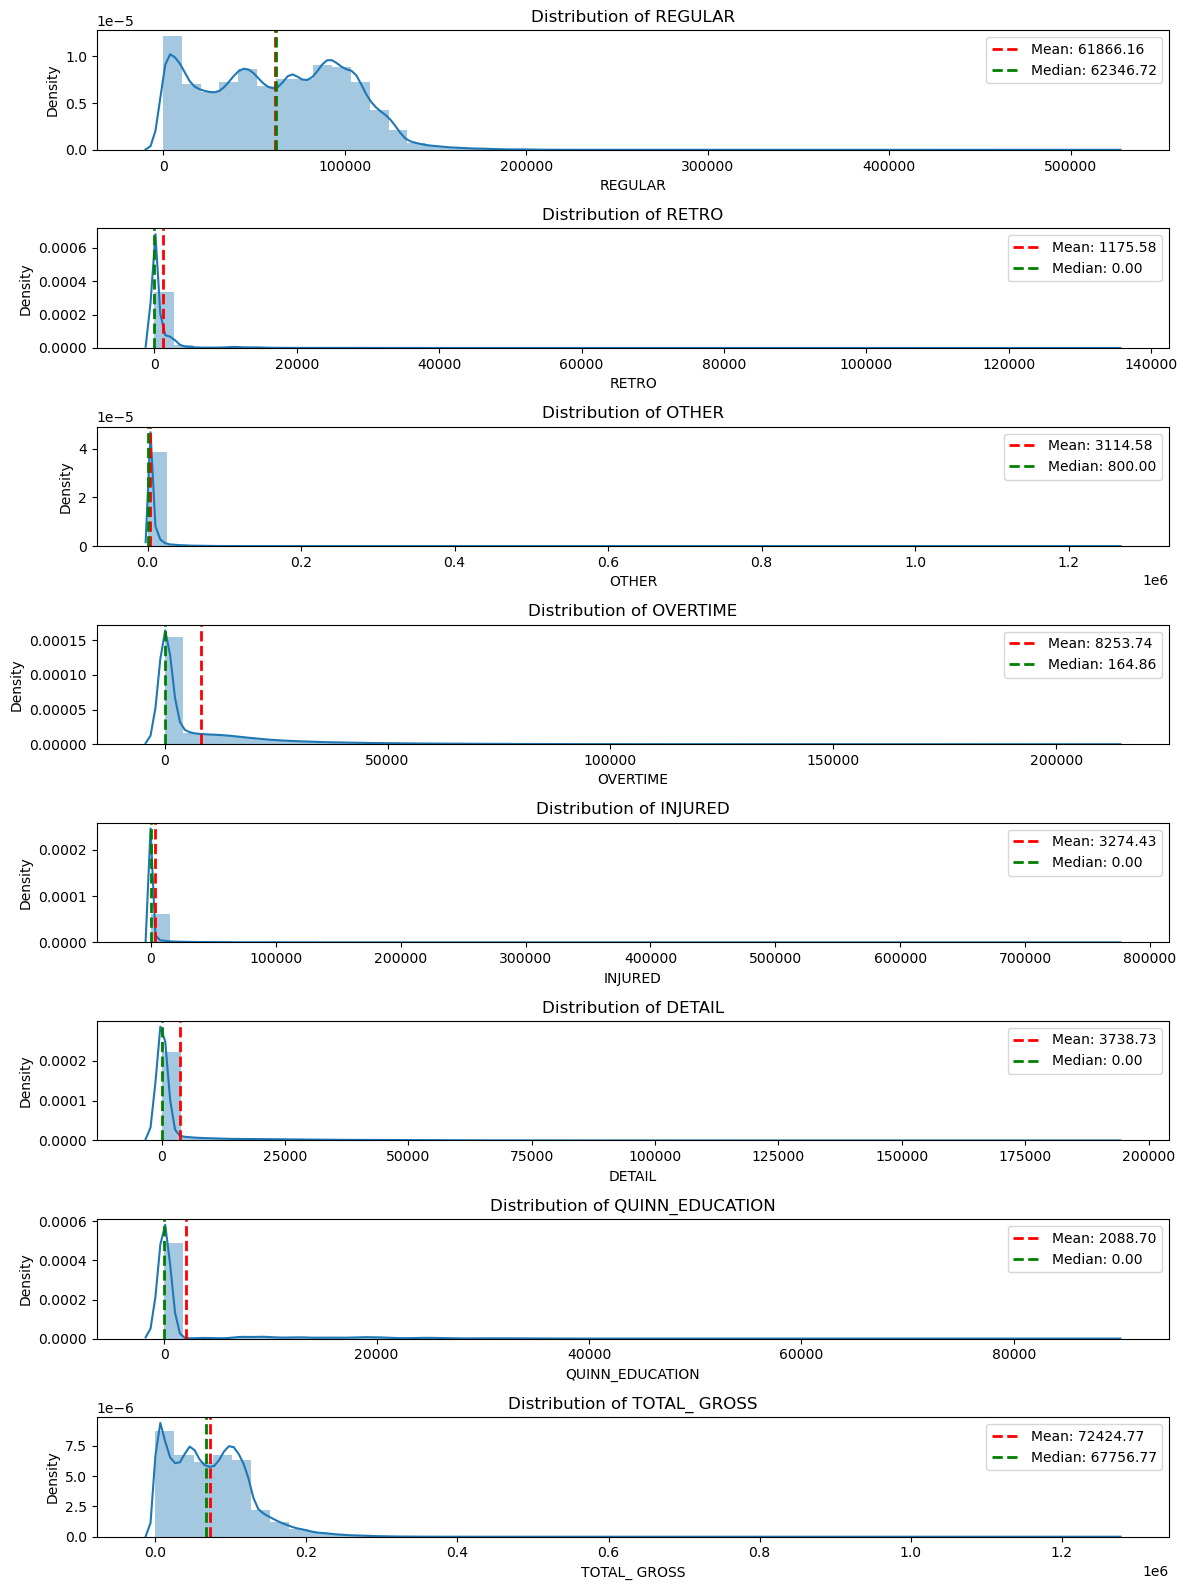

In [14]:
def plot_distribution(data, columns_to_plot):
    """
    Create distribution plots for specified acolumns in the dataset.

    Parameters:
    - data (pd.DataFrame): The dataset.
    - columns_to_plot (list): List of column names for which distribution plots will be created.

    Returns:
    - None: Plots the distribution plots.
    
    """
    
    # Create subplots for each column
    fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(12, 2 * len(columns_to_plot)))

    # Iterate through columns and create distribution plots
    for i, column in enumerate(columns_to_plot):
        # Plot the distribution
        sns.distplot(data[column].dropna(), bins=50, kde=True, ax=axes[i])

        # Add vertical lines for mean and median
        mean_val = data[column].mean()
        median_val = data[column].median()

        axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

        # Set titles and labels
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')

        # Add legend
        axes[i].legend()

        # Print values of mean and median
        print(f'{column} - Mean: {mean_val:.2f}, Median: {median_val:.2f}')

    plt.tight_layout()
    plt.show()


# Columns for which we want to create distribution plots
columns_to_plot = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']

plot_distribution(cleaned_data, columns_to_plot)

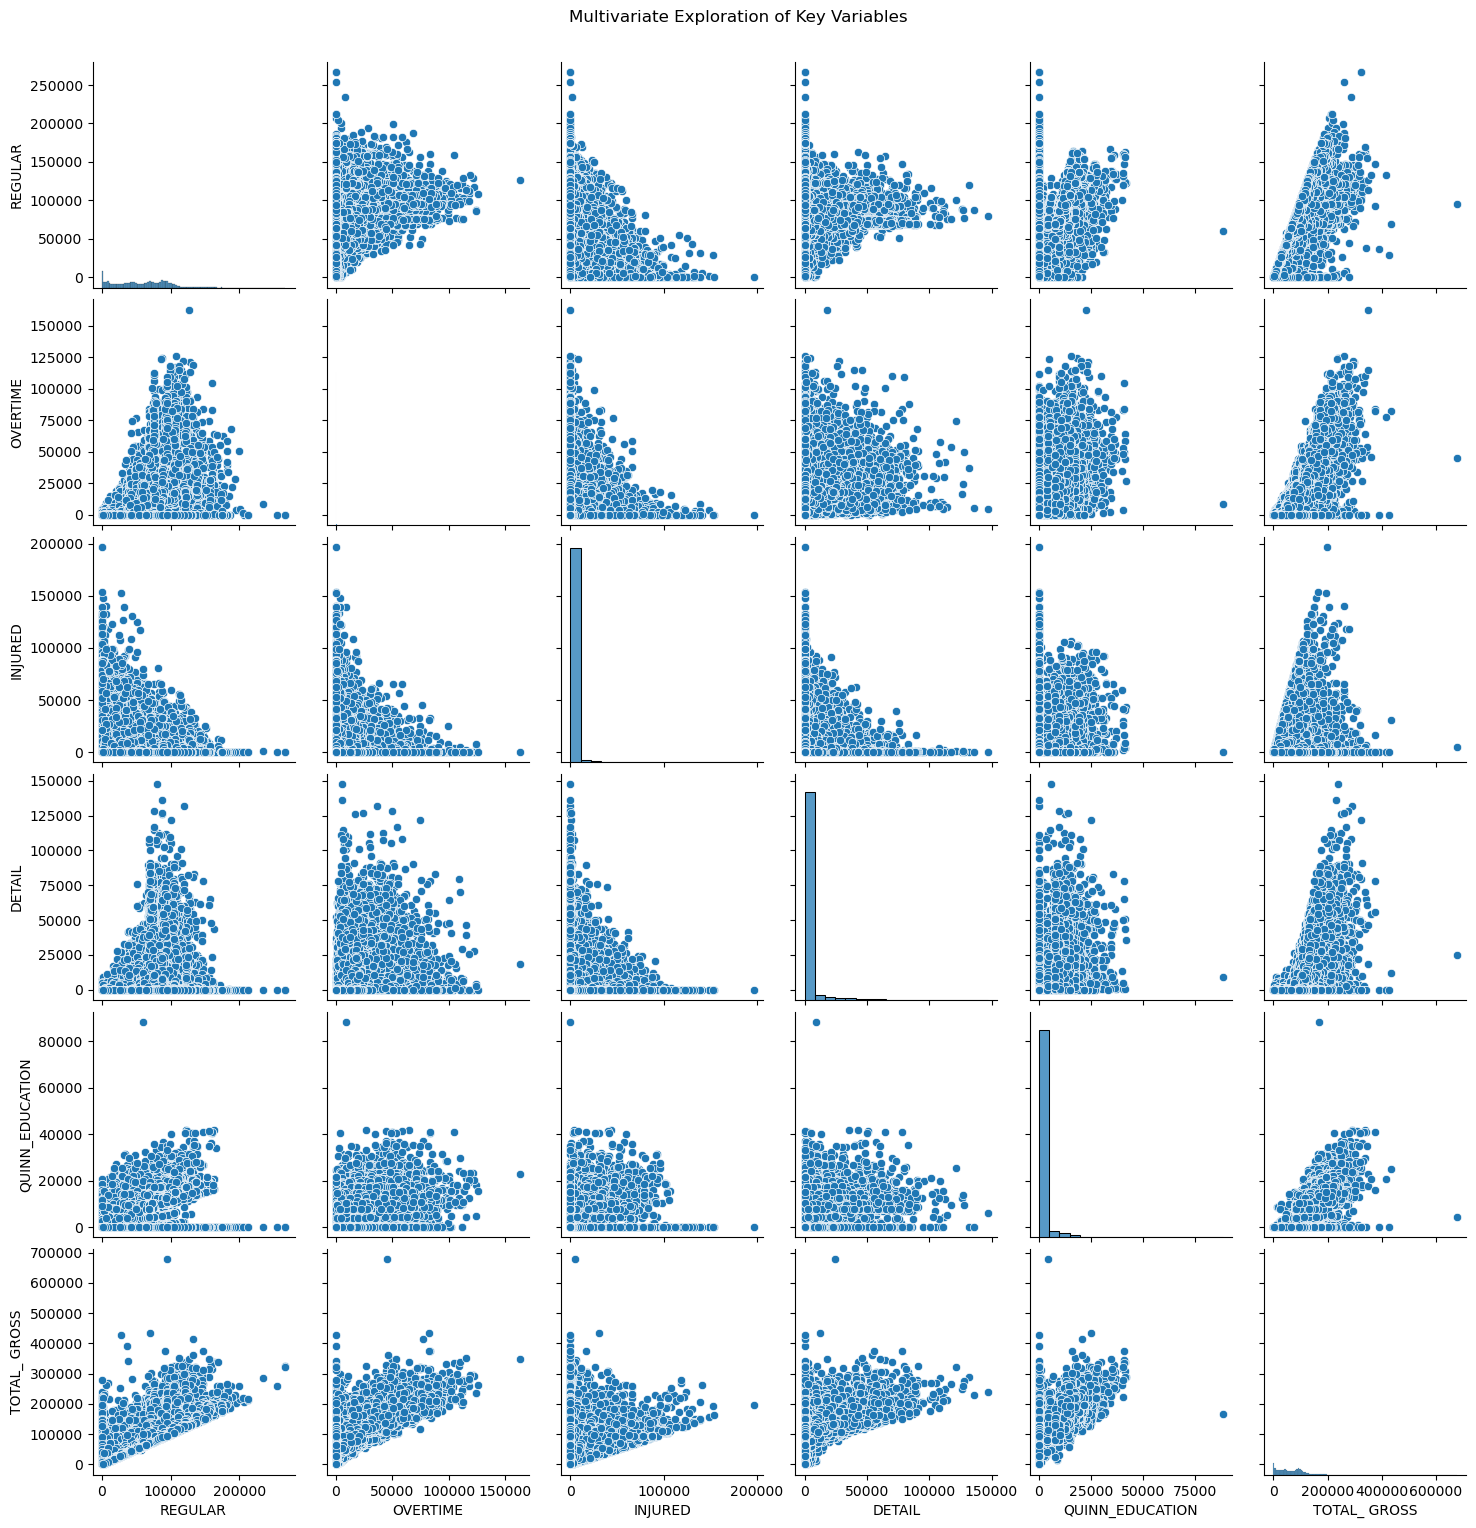

In [15]:
def visualize_relationships(data):
    """
    Creates a pairplot for exploring relationships between key variables in the given dataset.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing relevant columns.

    Returns:
    - None: Displays the pairplot.
    
    """
    
    # Extract relevant columns for advanced analysis
    advanced_data = data[['DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']]

    # Handle missing values if any
    advanced_data.dropna(inplace=True)

    # Create a pairplot for a quick overview of relationships between variables
    sns.pairplot(advanced_data)
    plt.suptitle('Multivariate Exploration of Key Variables', y=1.02)
    plt.show()

visualize_relationships(cleaned_data)


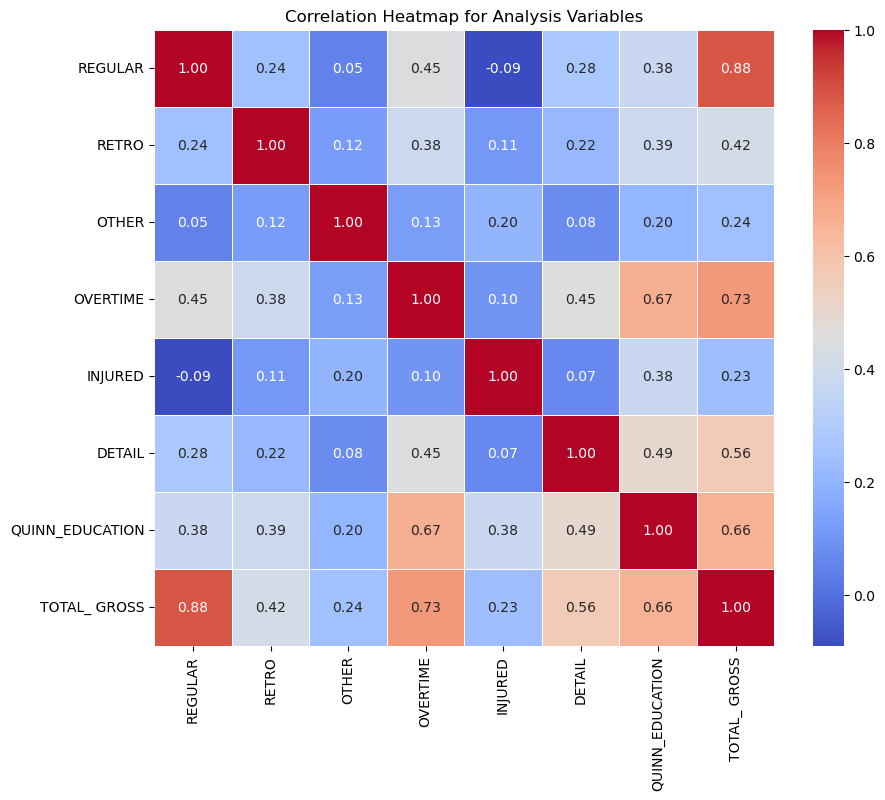

In [16]:
def plot_correlation_heatmap(data):
    """
    Calculates correlations between variables, plots a heatmap, and prints correlation values.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the variables for correlation analysis.

    Returns:
    - None
    
    """
    
    # Calculate correlations between variables
    correlation_matrix = data.corr()

    # Plot a heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap for Analysis Variables')
    plt.show()

plot_correlation_heatmap(cleaned_data)

### Analysis: Top Departments by Employee Frequency

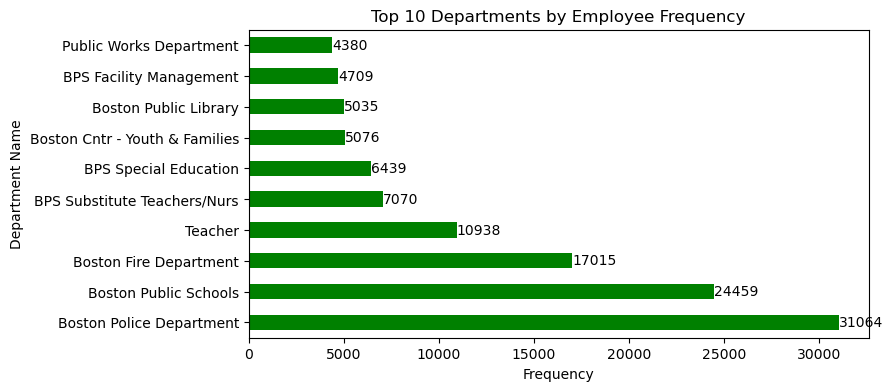

In [17]:
def plot_top_departments_by_frequency(data, column_name, top_n=10):
    """
    Plots the top N departments by employee frequency.

    Parameters:
    - data (DataFrame): The DataFrame containing the relevant data.
    - column_name (str): The column name representing departments.
    - top_n (int): The number of top departments to display. Default is 10.

    Returns:
    - None (Displays the plot).
    
    """
    
    plt.figure(figsize=(8, 4))
    
    # Extract and plot top N department counts
    department_counts = data[column_name].value_counts().head(top_n)
    department_counts.plot(kind='barh', color='green')
    
    # Set plot title and labels
    plt.title(f'Top {top_n} Departments by Employee Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Department Name')
    
    # Display counts for each department
    for index, value in enumerate(department_counts):
        plt.text(value, index, str(value), ha='left', va='center', color='black')
    
    plt.show()


plot_top_departments_by_frequency(cleaned_data, 'DEPARTMENT_NAME', top_n=10)

### Exploring Employee Titles: An Analysis of the Top 10 Titles by Frequency in the City of Boston

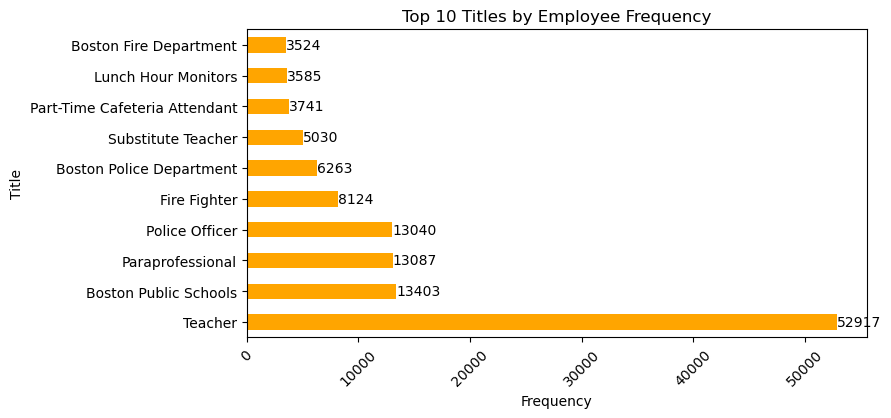

In [42]:
def plot_top_titles_frequency(data, title_column, top_n=10):
    """
    Plots a horizontal bar chart for the top titles by employee frequency.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the relevant data.
    - title_column (str): The column containing employee titles.
    - top_n (int): The number of top titles to include in the plot. Default is 10.

    Returns:
    - None (displays the plot).
    
    """
    
    # Select the 'TITLE' column from the DataFrame
    title_counts = data[title_column].value_counts().head(top_n)

    # Plotting
    plt.figure(figsize=(8, 4))
    title_counts.plot(kind='barh', color='orange')
    plt.title(f'Top {top_n} Titles by Employee Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Title')
    plt.xticks(rotation=45)

    # Displaying counts on the plot
    for index, value in enumerate(title_counts):
        plt.text(value, index, str(value), ha='left', va='center', color='black')

    # Show the plot
    plt.show()

plot_top_titles_frequency(cleaned_data, 'TITLE')

### Top Departments by Average Earnings: A Yearly Analysis (2011-2022)


Top 10 Departments by Average Earnings - 2020:
                    DEPARTMENT_NAME   TOTAL_ GROSS
115          Boston Fire Department  156167.631466
205                  Superintendent  139091.444000
116        Boston Police Department  132487.610436
202  School Support & Tranformation  129880.208636
121          Chief Academic Officer  128939.983333
6        Advancement & Ext. Affairs  123057.567500
41     BPS Counseling & Intervtn Ct  107802.244444
123         Chief Operating Officer  102816.432857
196    Public Facilities Department  101654.816615
134         Early Learning Services  100187.163214


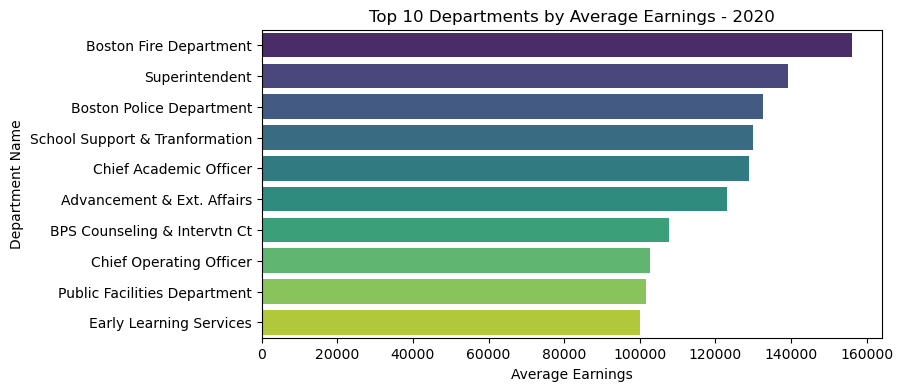


Top 10 Departments by Average Earnings - 2021:
                    DEPARTMENT_NAME   TOTAL_ GROSS
113          Boston Fire Department  159502.016631
205  School Support & Tranformation  138924.520345
208                  Superintendent  138561.101667
114        Boston Police Department  132114.566694
121         Chief Operating Officer  126323.112500
216   Turnaround and Transformation  117112.070000
62          BPS High School Renewal  111802.515000
40     BPS Counseling & Intervtn Ct  107861.878889
120         Chief Financial Officer  102395.500000
198    Public Facilities Department   99992.686712


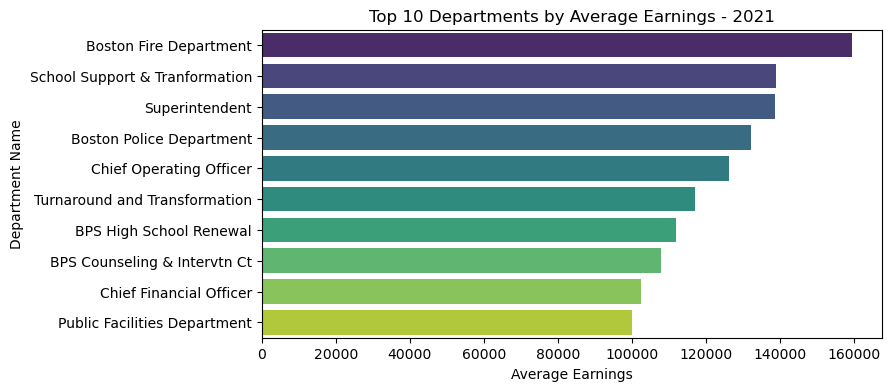


Top 10 Departments by Average Earnings - 2022:
                    DEPARTMENT_NAME   TOTAL_ GROSS
209                  Superintendent  165515.522000
113          Boston Fire Department  157168.677931
206  School Support & Tranformation  138156.887241
114        Boston Police Department  133494.427569
191     Office of People Operations  130983.397500
6        Advancement & Ext. Affairs  115472.685000
121         Chief Operating Officer  113039.931429
138             Enrollment Services  107566.303333
119          Chief Academic Officer  107459.603103
142              Finance Commission  103755.440000


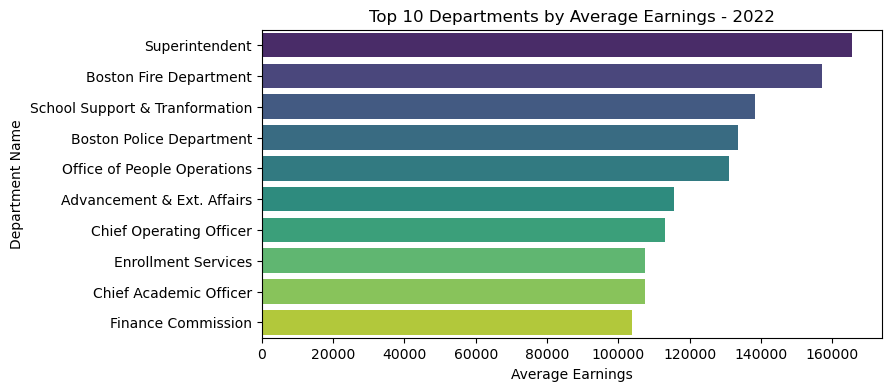


Top 10 Departments by Average Earnings - 2019:
                    DEPARTMENT_NAME   TOTAL_ GROSS
120          Boston Fire Department  150346.071087
152              Fenway High School  139982.850000
121        Boston Police Department  127094.346316
205  School Support & Tranformation  121749.805000
53          BPS Facility Mgmt/A & R  107874.653958
128         Chief Operating Officer  107808.816429
206             Strategy Department  107593.400000
129                  Chief of Staff  100908.910000
126          Chief Academic Officer   97969.447500
199    Public Facilities Department   97623.895156


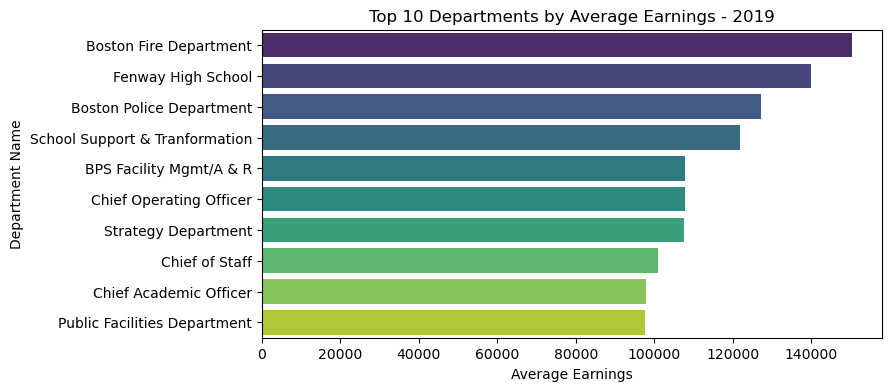


Top 10 Departments by Average Earnings - 2018:
                    DEPARTMENT_NAME   TOTAL_ GROSS
116        Boston Police Department  131321.462320
115          Boston Fire Department  130292.782802
202  School Support & Tranformation  113345.901333
123         Chief Operating Officer  109660.818000
203             Strategy Department  109625.015000
121          Chief Academic Officer  105029.732000
135         Early Learning Services  104018.642174
50          BPS Facility Mgmt/A & R   99615.795435
1       ASD Intergvernmtl Relations   95899.511111
124                  Chief of Staff   94169.270000


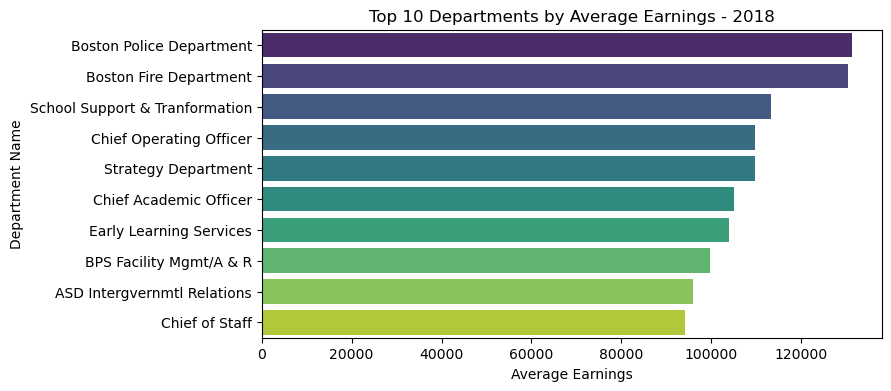


Top 10 Departments by Average Earnings - 2015:
                   DEPARTMENT_NAME   TOTAL_ GROSS
10   Asst Superintendent-Network C  142454.520000
12   Asst Superintendent-Network E  138486.955000
8    Asst Superintendent-Network A  135452.210000
14   Asst Superintendent-Network G  128415.942500
125         Boston Fire Department  122990.958790
203        Professional Developmnt  120919.720000
36    BPS Central Kitchen Food Ser  120400.010000
9    Asst Superintendent-Network B  118752.416667
127       Boston Police Department  118041.488626
45    BPS Counseling & Intervtn Ct  105949.311000


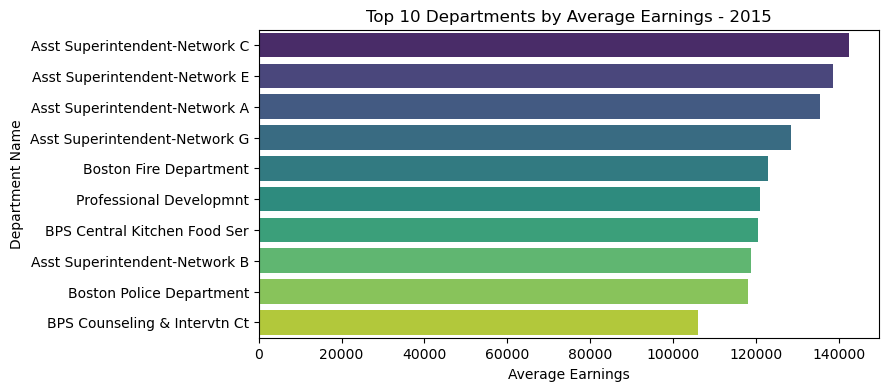


Top 10 Departments by Average Earnings - 2014:
                     DEPARTMENT_NAME  TOTAL_ GROSS
180    Capt.D.D.C-pd Details Section     361025.03
874   Police Lieutenant/Hdq Dispatch     306181.20
863                   Police Captain     289372.18
904   Police Sergeant/Hdq Dispatcher     281735.93
364      Dep Fire Chief Adm-Tech-ADR     267979.29
899       Police Sergeant/Bomb Squad     259692.59
1286                  Superintendent     259165.28
862    Police Capt/DDC-Hackney Inves     241231.34
363                   Dep Fire Chief     231773.66
4            Academic Superintendent     219500.85


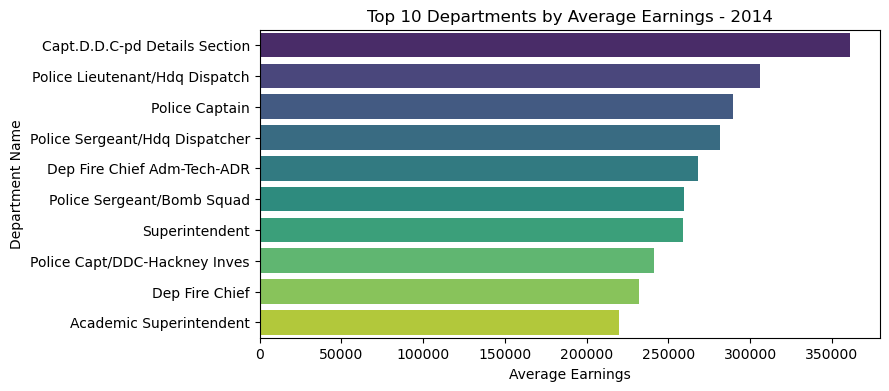


Top 10 Departments by Average Earnings - 2016:
                   DEPARTMENT_NAME   TOTAL_ GROSS
9    Asst Superintendent-Network A  132514.885000
206                 Superintendent  126056.875714
121       Boston Police Department  124787.164775
120         Boston Fire Department  122797.424913
128        Chief Operating Officer  117485.500000
204            Strategy Department  102616.662500
5                   Accountability  102073.280667
52         BPS Facility Mgmt/A & R   92946.905926
213     Treasury-Treasury Division   92521.689200
198   Public Facilities Department   91404.740714


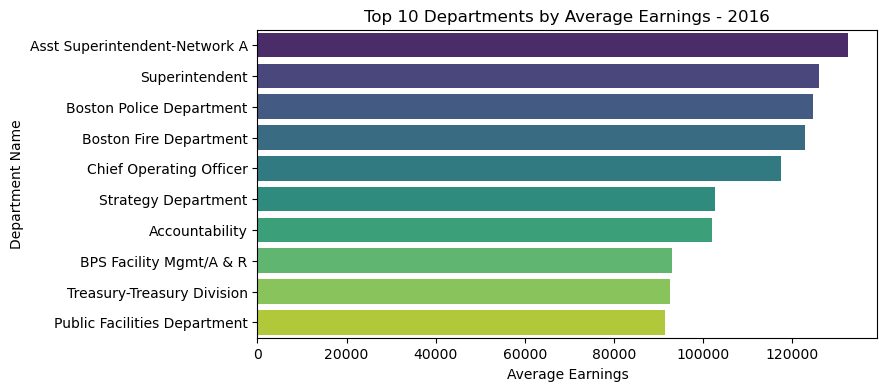


Top 10 Departments by Average Earnings - 2017:
                   DEPARTMENT_NAME   TOTAL_ GROSS
118         Boston Fire Department  128069.831476
119       Boston Police Department  124254.563280
10   Asst Superintendent-Network A  123350.682000
203            Strategy Department  118549.330000
126        Chief Operating Officer  107889.791429
205                 Superintendent  105557.351250
125        Chief Financial Officer  101583.576875
5                   Accountability   97531.927692
52         BPS Facility Mgmt/A & R   95241.828776
127                 Chief of Staff   93819.775000


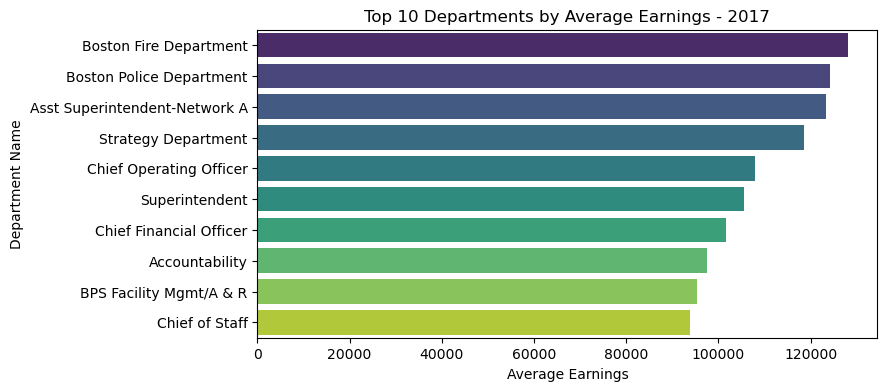


Top 10 Departments by Average Earnings - 2013:
                     DEPARTMENT_NAME   TOTAL_ GROSS
190    Capt.D.D.C-pd Details Section  243620.300000
879   Police Lieutenant/Hdq Dispatch  240193.163333
1307                  Superintendent  240150.320000
867                   Police Captain  239734.230000
909   Police Sergeant/Hdq Dispatcher  217037.150000
874               Police Lieut (Det)  213347.060000
869          Police Captain-DDC/HRCD  212761.650000
870               Police Captain/DDC  212368.490625
1322                   Supn-In Chief  200015.380000
866    Police Capt/DDC-Hackney Inves  197650.620000


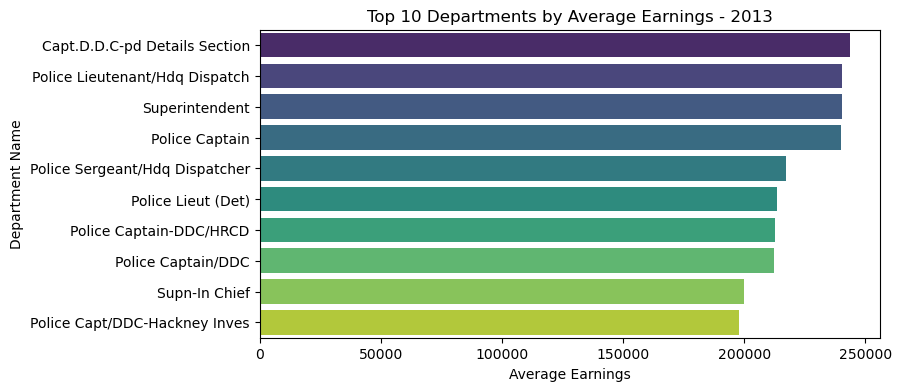


Top 10 Departments by Average Earnings - 2012:
                   DEPARTMENT_NAME   TOTAL_ GROSS
11          Boston Fire Department  108087.566675
12        Boston Police Department   97515.361269
45      Treasury-Treasury Division   79588.014231
47              Women's Commission   77330.360000
20  Dpt of Innovation & Technology   76217.942868
5       Administration and Finance   75976.623750
3     ASD Office of Budget Mangmnt   74511.899600
1      ASD Intergvernmtl Relations   69935.737273
33  Ofc Chf Public Works Transport   69257.215294
8              Auditing Department   66750.423171


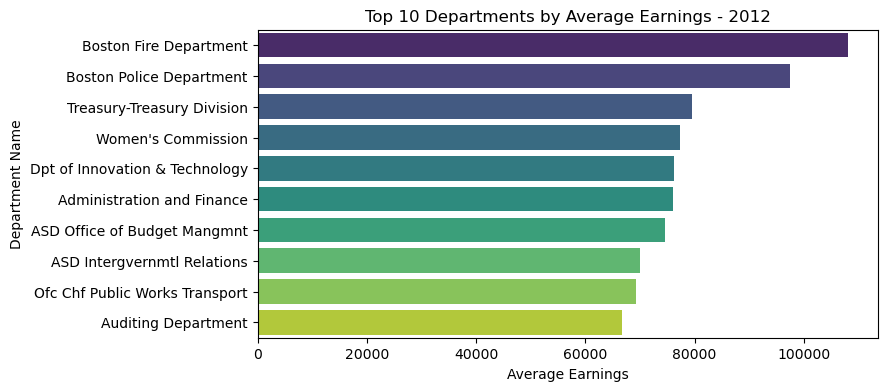


Top 10 Departments by Average Earnings - 2011:
                   DEPARTMENT_NAME   TOTAL_ GROSS
11          Boston Fire Department  105206.723360
12        Boston Police Department   96421.474132
5       Administration and Finance   85491.105000
47              Women's Commission   77574.670000
20  Dpt of Innovation & Technology   76280.706349
40          Small & Local Business   76001.487500
33  Ofc Chf Public Works Transport   74565.272500
1      ASD Intergvernmtl Relations   73674.262000
3     ASD Office of Budget Mangmnt   73451.413200
45      Treasury-Treasury Division   72783.973214


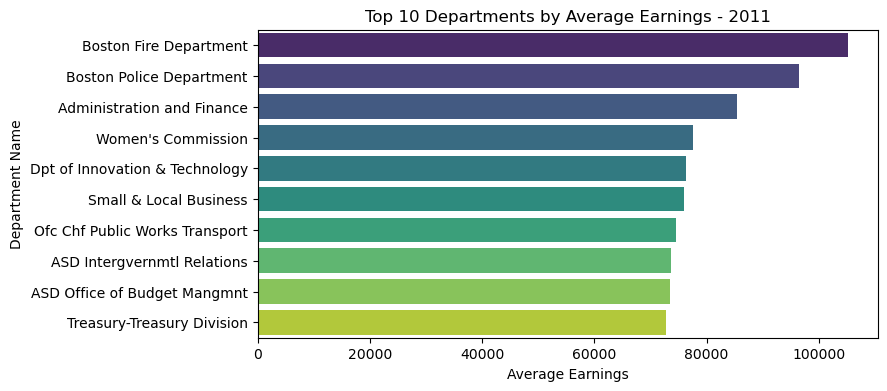

In [20]:
def plot_top_departments_by_earnings(data, top_departments_count=10):
    """
    Plots bar charts for the top departments by average earnings for each unique year in the dataset.

    Parameters:
    - data (DataFrame): The input DataFrame containing earnings data.
    - top_departments_count (int): The number of top departments to consider. Default is 10.

    Returns:
    - None
    
    """
    
    # Get unique years from the 'YEAR' column
    unique_years = data['YEAR'].dt.year.unique()

    # Loop through each year and create a separate plot for the top departments
    for year in unique_years:
        # Filter data for the current year
        data_for_year = data[data['YEAR'].dt.year == year]

        # Calculate average earnings by department for the current year
        avg_earnings_by_department = data_for_year.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].mean().reset_index()

        # Select the top departments for the current year
        top_departments = avg_earnings_by_department.nlargest(top_departments_count, 'TOTAL_ GROSS')

        # Print department names and average earnings for the current year
        print(f"\nTop {top_departments_count} Departments by Average Earnings - {year}:")
        print(top_departments[['DEPARTMENT_NAME', 'TOTAL_ GROSS']])

        # Plot for the current year
        plt.figure(figsize=(8, 4))
        sns.barplot(x='TOTAL_ GROSS', y='DEPARTMENT_NAME', data=top_departments, palette='viridis')
        plt.title(f'Top {top_departments_count} Departments by Average Earnings - {year}')
        plt.xlabel('Average Earnings')
        plt.ylabel('Department Name')
        plt.show()

plot_top_departments_by_earnings(cleaned_data, top_departments_count=10)

### Analysis of Annual Earnings Trends: An Overview of Total Gross Earnings from 2011 to 2022


Annual Earnings Summary:
              count          mean           std    min         25%        50%  \
YEAR                                                                            
2011-01-01  20509.0  63263.280861  40650.690655  11.70  29816.7900  62266.260   
2012-01-01  21140.0  62207.346421  41989.716389   5.65  26299.4475  60893.575   
2013-01-01  22469.0  61611.571225  43526.331383   1.68  23192.3600  59387.470   
2014-01-01  22233.0  66920.917950  48542.222067   2.53  26786.9100  61714.870   
2015-01-01  21902.0  70856.195026  48641.424752  25.00  30935.3300  67204.910   
2016-01-01  22046.0  71677.868383  51862.214555   2.14  30219.9025  66063.970   
2017-01-01  22245.0  71517.447431  51127.428966   3.50  30160.5500  66218.240   
2018-01-01  23603.0  72896.136820  56039.456681   0.00  25350.0000  66288.650   
2019-01-01  23312.0  77073.528048  57453.149872   0.89  29693.0050  70768.985   
2020-01-01  21858.0  83262.399459  55908.205034   0.38  40212.9975  78906.165   
20

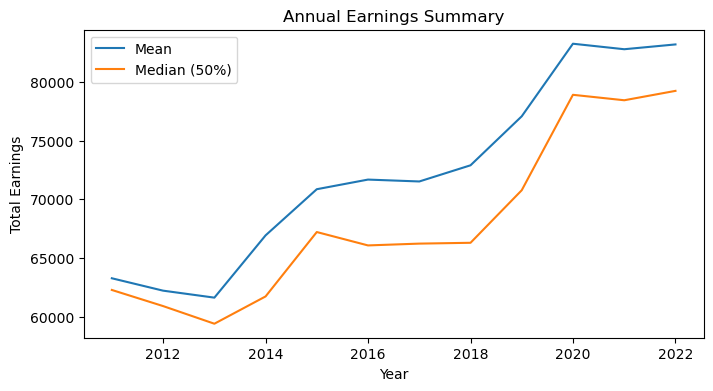

In [21]:
def plot_annual_earnings_summary(dataframe, year_column, earnings_column):
    """
    Calculates and plots the annual earnings summary.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame containing earnings data.
    - year_column (str): The column name representing the year.
    - earnings_column (str): The column name representing total gross earnings.

    Returns:
    - None
    
    """
    
    # Calculate annual earnings summary
    annual_earnings_summary = dataframe.groupby(year_column)[earnings_column].describe()

    # Print annual earnings summary including salary information
    print("\nAnnual Earnings Summary:")
    print(annual_earnings_summary)

    # Plot annual earnings summary
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=annual_earnings_summary.index, y=annual_earnings_summary['mean'], label='Mean')
    sns.lineplot(x=annual_earnings_summary.index, y=annual_earnings_summary['50%'], label='Median (50%)')
    plt.title('Annual Earnings Summary')
    plt.xlabel('Year')
    plt.ylabel('Total Earnings')
    plt.legend()
    plt.show()

# 'YEAR' is the column representing the year,
# and 'TOTAL_GROSS' is the column representing total gross earnings.
plot_annual_earnings_summary(cleaned_data, 'YEAR', 'TOTAL_ GROSS')

### Seasonal Decomposition Analysis of Total Earnings Over Time

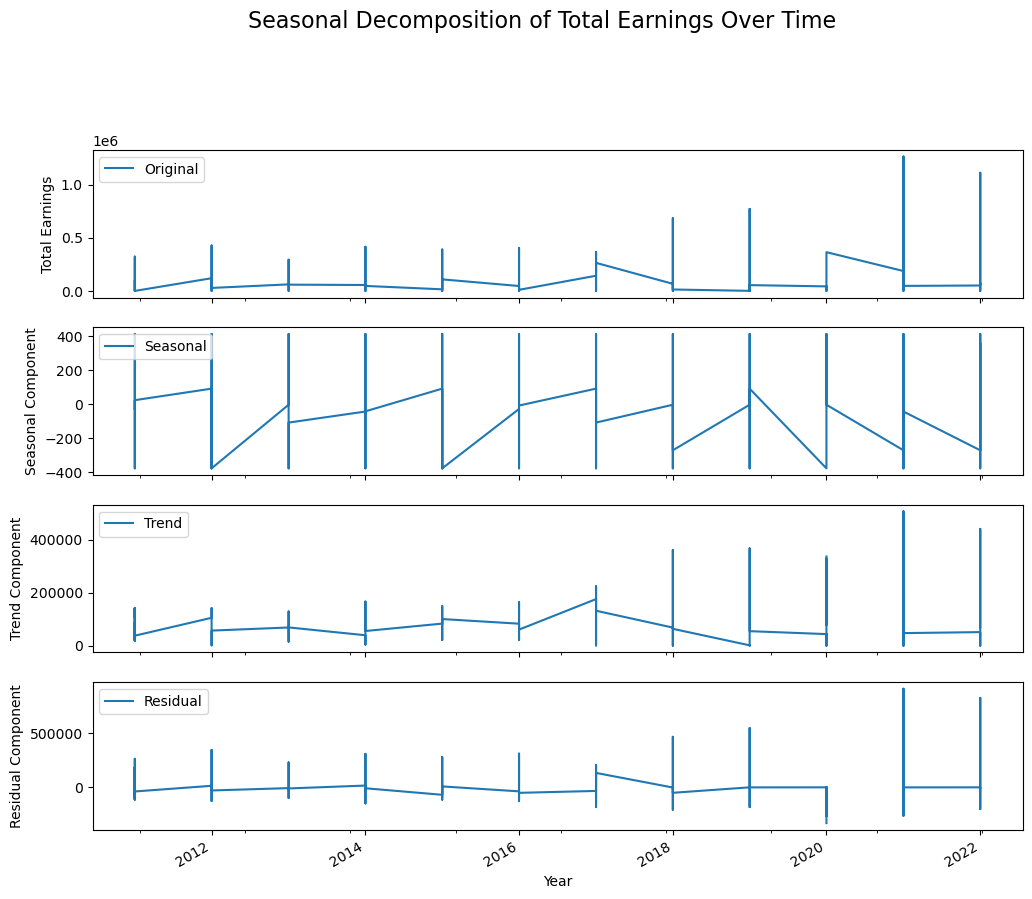

In [22]:
def plot_seasonal_decomposition(dataframe, date_column, value_column, frequency=12):
    """
    Plots the seasonal decomposition of a time series.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the time series data.
    - date_column (str): The name of the column representing the date.
    - value_column (str): The name of the column containing the time series values.
    - frequency (int): The frequency of the time series (default is 12 for monthly data).

    Returns:
    - None: Displays the seasonal decomposition plot.
    
    """

    dataframe.set_index(date_column, inplace=True)

    # Handle missing values in the value column
    dataframe[value_column].fillna(method='ffill', inplace=True)  # Forward fill or use another method

    # Ensure enough data points for seasonal decomposition
    if len(dataframe) < frequency:
        print("Insufficient data for seasonal decomposition. Consider using a larger dataset.")
    else:
        # Apply seasonal decomposition with an additive model
        result = seasonal_decompose(dataframe[value_column], model='additive', period=frequency)

        # Access components
        seasonal_component = result.seasonal
        trend_component = result.trend
        residual_component = result.resid

        # Plot the decomposition with labels
        fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
        
        dataframe[value_column].plot(ax=axes[0], label='Original')
        axes[0].legend(loc='upper left')
        axes[0].set_ylabel('Total Earnings')

        seasonal_component.plot(ax=axes[1], label='Seasonal')
        axes[1].legend(loc='upper left')
        axes[1].set_ylabel('Seasonal Component')

        trend_component.plot(ax=axes[2], label='Trend')
        axes[2].legend(loc='upper left')
        axes[2].set_ylabel('Trend Component')

        residual_component.plot(ax=axes[3], label='Residual')
        axes[3].legend(loc='upper left')
        axes[3].set_ylabel('Residual Component')

        plt.xlabel('Year')
        plt.suptitle('Seasonal Decomposition of Total Earnings Over Time', y=1.02, fontsize=16)
        plt.show()

plot_seasonal_decomposition(cleaned_data, 'YEAR', 'TOTAL_ GROSS')

### Temporal Autocorrelation Analysis of Total Gross Earnings in City of Boston Employee Compensation

<Figure size 800x400 with 0 Axes>

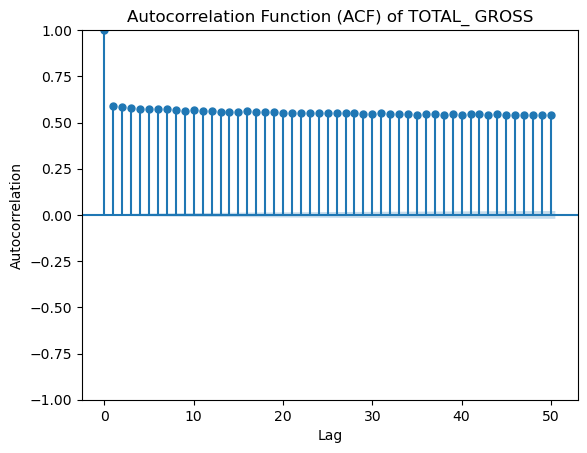

In [28]:
def plot_total_earnings_autocorrelation(data_frame, total_gross_column, lags=50):
    """
    Plot the autocorrelation function (ACF) of the 'TOTAL_GROSS' column in a time series.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing the time series data.
    - total_gross_column (str): The column name representing total gross earnings.
    - lags (int): The number of lags to include in the ACF plot. Default is 50.

    Returns:
    - None (displays plots).
    
    """
    
    # 'YEAR'column set it as the index
    data_frame.set_index('YEAR', inplace=True)

    # Handle missing values in 'TOTAL_GROSS' column using forward fill
    data_frame[total_gross_column].fillna(method='ffill', inplace=True)

    # Calculate autocorrelation values
    autocorrelation_values = acf(data_frame[total_gross_column], nlags=lags)

    # Create a DataFrame to display the results
    autocorrelation_df = pd.DataFrame({'Lag': range(lags + 1), 'Autocorrelation': autocorrelation_values})

    # Plot autocorrelation function (ACF)
    plt.figure(figsize=(8, 4))
    plot_acf(data_frame[total_gross_column], lags=lags)
    plt.title(f'Autocorrelation Function (ACF) of {total_gross_column}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

plot_total_earnings_autocorrelation(cleaned_data, 'TOTAL_ GROSS', lags=50)

### Analysis of Average Overtime Earnings Trends (2011-2022) for City of Boston Employees

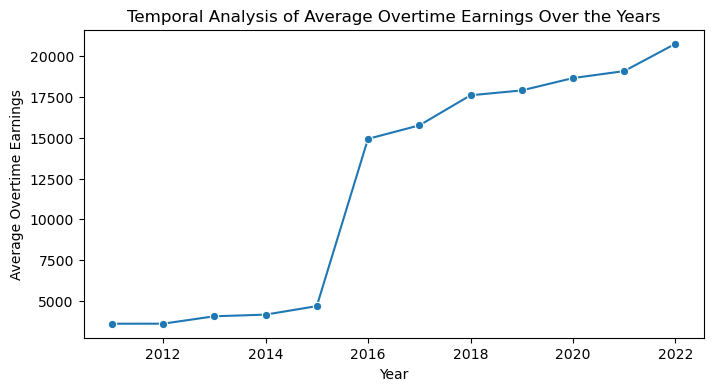

In [30]:
def plot_average_overtime_trend(data):
    """
    Plot the temporal trend of average overtime earnings over the years.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing the relevant columns, including 'YEAR' and 'OVERTIME'.

    Returns:
    - None
    """
    # Calculate the average overtime earnings for each year
    average_overtime_by_year = data.groupby('YEAR')['OVERTIME'].mean().reset_index()

    # Plot the temporal trend
    plt.figure(figsize=(8, 4))
    sns.lineplot(x='YEAR', y='OVERTIME', data=average_overtime_by_year, marker='o')
    plt.title('Temporal Analysis of Average Overtime Earnings Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Overtime Earnings')
    plt.show()

plot_average_overtime_trend(cleaned_data)

### Analyzing Long-Term Trends in Total Earnings for Teachers in the City of Boston (2011-2022)

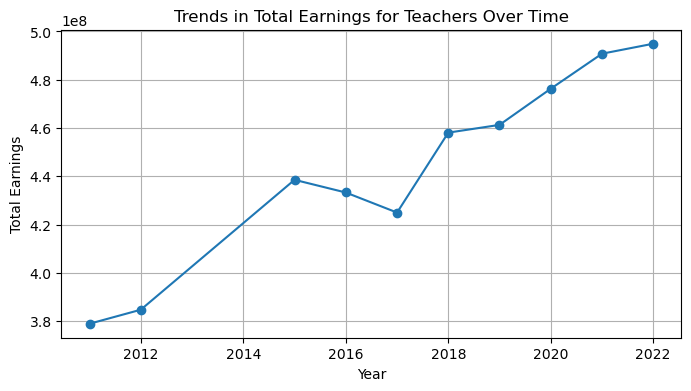

In [32]:
def plot_teacher_earnings_trends(combined_data):
    """
    Plots the trends in total earnings for teachers over time.

    Parameters:
    - combined_data (pd.DataFrame): The combined dataset containing employee data.

    Returns:
    - None: Displays the plot.
    
    """
    
    # Filter data for employees with the job title 'Teacher'
    teacher_data = combined_data[combined_data['TITLE'] == 'Teacher']

    # Group data by year and calculate the total earnings for each year
    teacher_yearly_earnings = teacher_data.groupby('YEAR')['TOTAL_ GROSS'].sum().reset_index()

    # Plot the trends
    plt.figure(figsize=(8, 4))
    plt.plot(teacher_yearly_earnings['YEAR'], teacher_yearly_earnings['TOTAL_ GROSS'], marker='o')
    plt.title('Trends in Total Earnings for Teachers Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Earnings')
    plt.grid(True)
    plt.show()

plot_teacher_earnings_trends(cleaned_data)


### Exploring Total Gross Earnings Trends: A Study of the Boston Police Department Over Time

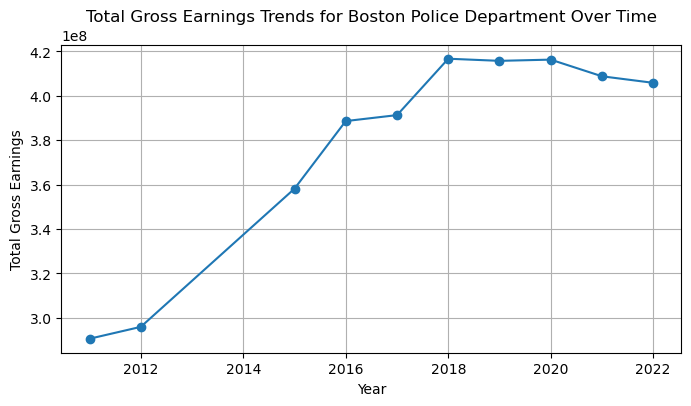

In [35]:
def plot_earnings_trends(data, department_name, earnings_column, year_column='YEAR'):
    """
    Plots the total gross earnings trends for a specific department over time.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the earnings data.
    - department_name (str): The name of the department to filter the data.
    - earnings_column (str): The column representing earnings values.
    - year_column (str, optional): The column representing the year. Default is 'YEAR'.

    Returns:
    - None: Displays the plot.
    """
    # Filter data for the specified department
    department_data = data[data['DEPARTMENT_NAME'] == department_name]

    # Group data by year and calculate the total gross earnings
    earnings_by_year = department_data.groupby(year_column)[earnings_column].sum().reset_index()

    # Plotting the trends
    plt.figure(figsize=(8, 4))
    plt.plot(earnings_by_year[year_column], earnings_by_year[earnings_column], marker='o', linestyle='-')
    plt.title(f'Total Gross Earnings Trends for {department_name} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Gross Earnings')
    plt.grid(True)
    plt.show()
    
plot_earnings_trends(combined_data, 'Boston Police Department', 'TOTAL_ GROSS')

### Exploring Titles with the Lowest Average Earnings: An Analysis of Average Total Gross Earnings for Titles

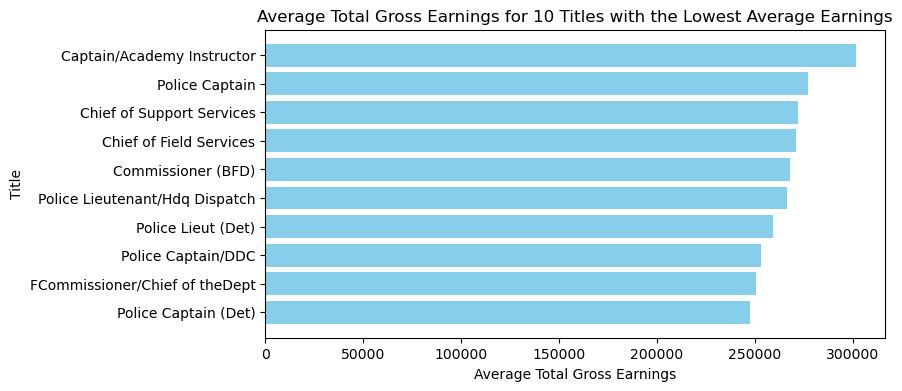

In [36]:
def plot_lowest_earning_titles(data, title_column='TITLE', earnings_column='TOTAL_ GROSS', num_titles=10):
    """
    Plot a bar chart of the titles with the lowest average earnings.

    Parameters:
    - data (DataFrame): The DataFrame containing the earnings data.
    - title_column (str): The column name for job titles. Default is 'TITLE'.
    - earnings_column (str): The column name for total gross earnings. Default is 'TOTAL_ GROSS'.
    - num_titles (int): The number of titles to display. Default is 10.

    Returns:
    - None: Displays the bar chart and prints the titles with the lowest average earnings.
    
    """
    
    # Group by title and calculate the average total gross earnings for each title
    average_earnings_by_title = data.groupby(title_column)[earnings_column].mean().reset_index().sort_values(by=earnings_column, ascending=True)

    # Select the last n titles with the lowest average earnings
    lowest_earning_titles = average_earnings_by_title.tail(num_titles)

    # Plot a bar chart to visualize average total gross earnings for the last n titles
    plt.figure(figsize=(8, 4))
    plt.barh(lowest_earning_titles[title_column], lowest_earning_titles[earnings_column], color='skyblue')
    plt.title(f'Average Total Gross Earnings for {num_titles} Titles with the Lowest Average Earnings')
    plt.xlabel('Average Total Gross Earnings')
    plt.ylabel('Title')
    plt.show()

plot_lowest_earning_titles(cleaned_data)

### Visualizing the Relationship Between INJURED and DETAIL Categories and Earnings in Employee Data

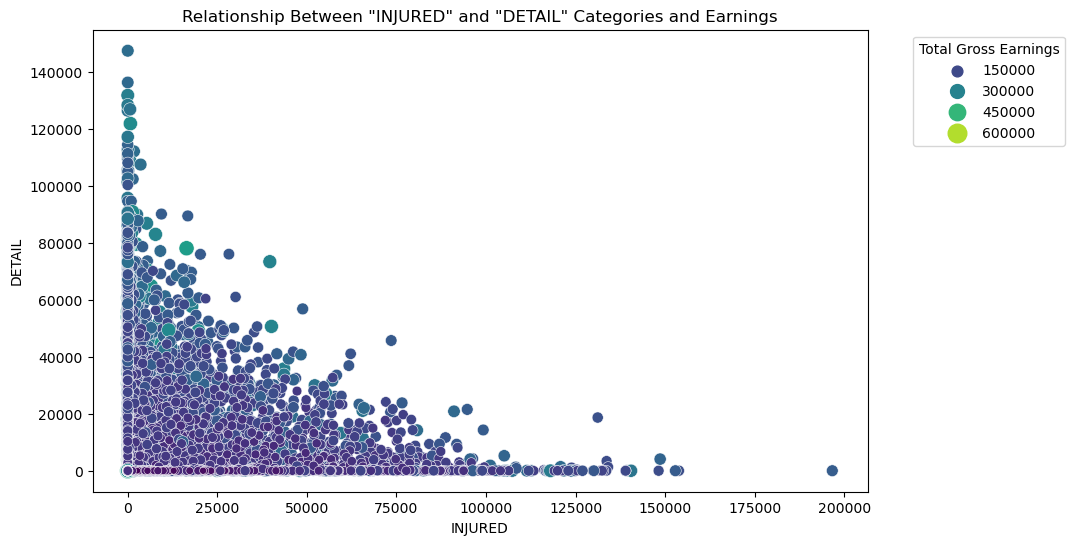

In [37]:
def plot_injured_detail_relationship(data):
    """
    Create a scatter plot to visualize the relationship between "INJURED" and "DETAIL" categories and earnings.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing columns 'INJURED', 'DETAIL', and 'TOTAL_ GROSS'.

    Returns:
    - None
    """
    # Select relevant columns for analysis
    injured_detail_data = data[['INJURED', 'DETAIL', 'TOTAL_ GROSS']]

    # Handle missing values if any
    injured_detail_data.dropna(inplace=True)

    # Scatter plot to visualize the relationship between "INJURED" and "DETAIL" categories and earnings
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='INJURED', y='DETAIL', hue='TOTAL_ GROSS', data=injured_detail_data, palette='viridis', size='TOTAL_ GROSS', sizes=(20, 200))
    plt.title('Relationship Between "INJURED" and "DETAIL" Categories and Earnings')
    plt.xlabel('INJURED')
    plt.ylabel('DETAIL')
    plt.legend(title='Total Gross Earnings', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    
plot_injured_detail_relationship(cleaned_data)

### Exploring the Relationship Between Regular Earnings and Total Gross Earnings: A Regression Analysis

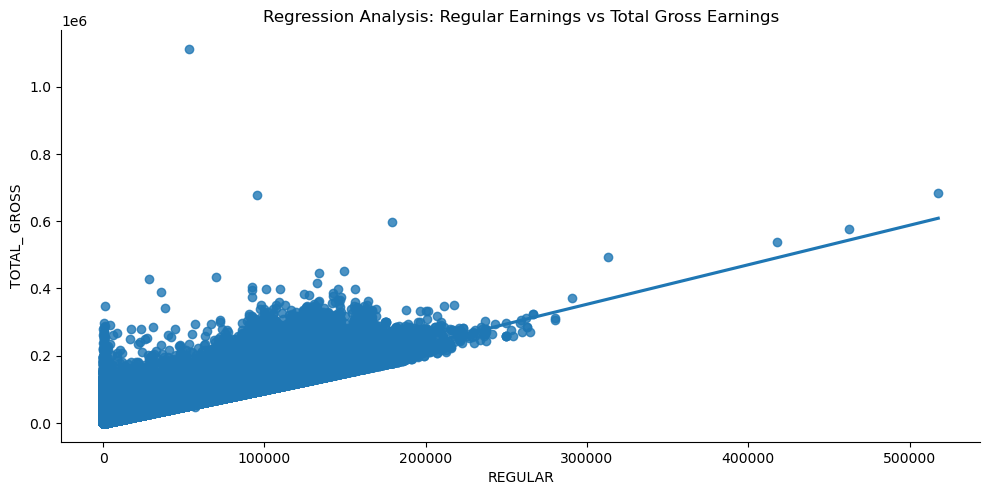

In [41]:
def perform_regression_analysis(data, x_variable, y_variable, title):
    """
    Perform a regression analysis and plot the relationship between selected variables.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - x_variable (str): The variable to be plotted on the x-axis.
    - y_variable (str): The variable to be plotted on the y-axis.
    - title (str): The title of the plot.

    Returns:
    - None
    
    """
    
    # Create a scatter plot with a regression line
    sns.lmplot(x=x_variable, y=y_variable, data=data, aspect=2)
    
    # Set plot title
    plt.title(title)
    
    # Show the plot
    plt.show()

perform_regression_analysis(cleaned_data, 'REGULAR', 'TOTAL_ GROSS', 'Regression Analysis: Regular Earnings vs Total Gross Earnings')


### Analysis of Top Postal Codes with the Highest Median Total Gross Earnings

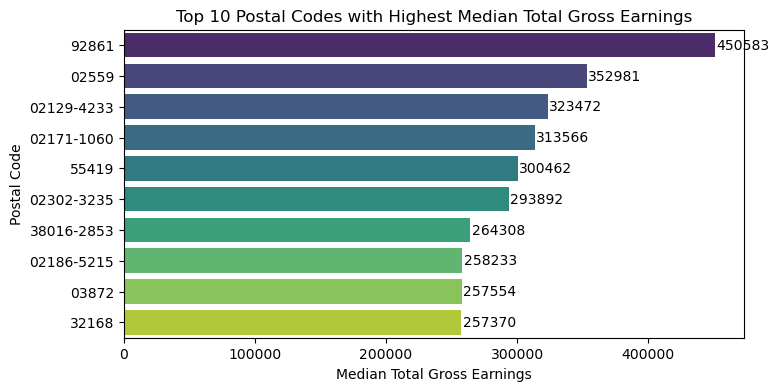

,POSTAL,TOTAL_ GROSS
20827,92861,450583.200
19010,02559,352981.990
9660,02129-4233,323472.480
15560,02171-1060,313566.180
20626,55419,300462.220
16994,02302-3235,293892.240
20548,38016-2853,264308.380
16311,02186-5215,258233.365
19533,03872,257554.270
504,32168,257370.940


In [39]:
def plot_top_postal_codes_earnings(data, postal_col='POSTAL', earnings_col='TOTAL_ GROSS', top_n=10):
    """
    Plots a horizontal bar chart for the top postal codes with the highest median total gross earnings.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing earnings data.
    - postal_col (str): The column name for postal codes.
    - earnings_col (str): The column name for total gross earnings.
    - top_n (int): The number of top postal codes to display.

    Returns:
    - pd.DataFrame: The top postal codes and their corresponding median total gross earnings.
    """
    # Group by postal code and calculate the median total gross earnings for each postal code
    median_earnings_by_postal = data.groupby(postal_col)[earnings_col].median().reset_index().sort_values(by=earnings_col, ascending=False)

    # Select the top N postal codes
    top_postal = median_earnings_by_postal.head(top_n)

    # Plot a horizontal bar chart to visualize median total gross earnings for the top N postal codes
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=earnings_col, y=postal_col, data=top_postal, ci=None, palette='viridis')
    plt.title(f'Top {top_n} Postal Codes with Highest Median Total Gross Earnings')
    plt.xlabel('Median Total Gross Earnings')
    plt.ylabel('Postal Code')

    # Annotate counts on the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width() + 1000, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black')

    plt.show()

    return top_postal

plot_top_postal_codes_earnings(cleaned_data)

### Analysis of Annual Earnings Distribution Over the Years

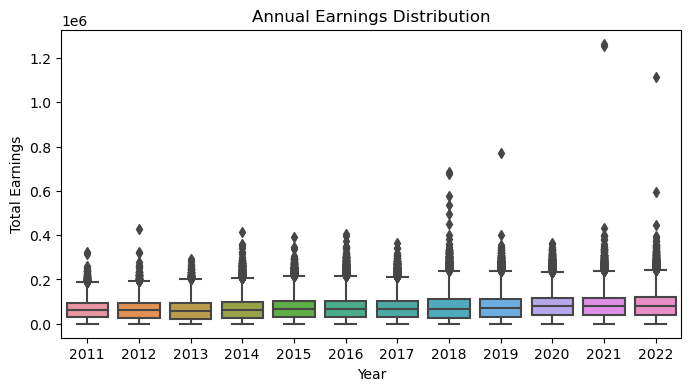

In [60]:
# 'DATE' is the datetime column
cleaned_data['YEAR'] = cleaned_data['YEAR'].dt.year

# Plot box plot for annual earnings distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x='YEAR', y='TOTAL_ GROSS', data=cleaned_data)
plt.title('Annual Earnings Distribution')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.show()